# 1. Import necessary libraries:

In [22]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, accuracy_score

# 2. Load dataset

In [2]:
wine_data = load_wine()
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
wine_data_df = pd.DataFrame(data = wine_data.data, columns=wine_data['feature_names'])
wine_data_df['target']=wine_data.target
wine_data_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# 3. Data Understanding:

## 3.1: Initial Analysis:

In [4]:
wine_data_df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [5]:
wine_data_df.shape

(178, 14)

In [6]:
wine_data_df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

# 4. Model Building:

In [7]:
X = wine_data_df.drop('target', axis = 1)
y = wine_data_df[['target']]

In [8]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [9]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)

In [11]:
X_train.shape, y_train.shape

((142, 13), (142, 1))

In [12]:
X_test.shape, y_test.shape

((36, 13), (36, 1))

# 5. Model training:

## BEFORE STANDARDISATION:

## K = 3:

In [13]:
knn_model = KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy Score = ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.71      0.86      0.77        14
           2       0.67      0.40      0.50        10

    accuracy                           0.78        36
   macro avg       0.77      0.75      0.74        36
weighted avg       0.77      0.78      0.76        36

Accuracy Score =  0.7777777777777778


### K=5

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy score = ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.67      0.86      0.75        14
           2       0.60      0.30      0.40        10

    accuracy                           0.75        36
   macro avg       0.73      0.72      0.70        36
weighted avg       0.73      0.75      0.72        36

Accuracy score =  0.75


## K=9:

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print('Accuracy Score = ', accuracy_score(y_test, y_pred))

Accuracy Score =  0.8055555555555556


## After Standardization:
Making all the input values similar type.

## K = 3:

In [16]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state=12, stratify=y)

In [18]:
knn_model = KNeighborsClassifier(n_neighbors= 3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy Score = ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.86      0.92        14
           2       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36

Accuracy Score =  0.9444444444444444


### K=5

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy score = ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Accuracy score =  0.9722222222222222


## K=9:

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print('Accuracy Score = ', accuracy_score(y_test, y_pred))

Accuracy Score =  0.9722222222222222


## How to choose optimal value for k?

In [31]:
cv_scores = []

for i in range(1, 31, 1):
    knn_model = KNeighborsClassifier(n_neighbors= i)
    k_fold = KFold(n_splits= 5, shuffle= True, random_state=12)
    cross_v_score = cross_val_score(estimator= knn_model,X= scaled_X, y=y, cv = k_fold )
    cv_scores.append(cross_v_score.mean().round(5))

In [32]:
cv_scores

[0.96032,
 0.94349,
 0.96048,
 0.94905,
 0.9719,
 0.96603,
 0.97175,
 0.97175,
 0.96603,
 0.96603,
 0.96603,
 0.96603,
 0.97746,
 0.96603,
 0.96603,
 0.96603,
 0.96603,
 0.96032,
 0.96603,
 0.97175,
 0.98317,
 0.97746,
 0.97746,
 0.97175,
 0.97175,
 0.97175,
 0.97175,
 0.97175,
 0.96619,
 0.97746]

In [33]:
import numpy as np
cv_scores_arr = np.array(cv_scores)
print(cv_scores_arr.mean())
print(cv_scores_arr.std())

0.9679686666666668
0.007941911496750777


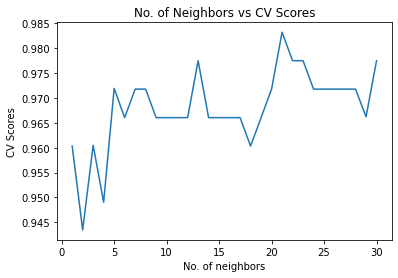

In [34]:
plt.plot(range(1,31), cv_scores)
plt.xlabel('No. of neighbors')
plt.ylabel('CV Scores')
plt.title('No. of Neighbors vs CV Scores')
plt.show()

In [35]:
cv_scores.index(max(cv_scores))

20